#Title: Predicting electricity meter reading


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit, RepeatedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#Reading CSV file


In [ ]:
    
train_df = pd.read_csv('train.csv')
from numpy.random import default_rng
arr_indices_top_drop = default_rng().choice(train_df.index, size=600000, replace=False)
train_df.drop(index=arr_indices_top_drop,inplace=True)
train_df

,building_id,timestamp,meter_reading,primary_use,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
5,9,2016-01-01 00:00:00,0.0000,Office,27000,2010,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
10,15,2016-01-01 00:00:00,0.0000,Office,83957,1974,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
11,16,2016-01-01 00:00:00,0.0000,Education,54644,1996,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
13,19,2016-01-01 00:00:00,0.0000,Office,18717,2004,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
20,30,2016-01-01 00:00:00,0.0000,Education,93897,1999,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
698643,62,2016-12-31 23:00:00,350.5630,Lodging/residential,42731,2001,20.6,NaN,10.0,0.0,1021.1,0.0,0.0
698644,63,2016-12-31 23:00:00,111.3940,Lodging/residential,41617,2001,20.6,NaN,10.0,0.0,1021.1,0.0,0.0
698647,66,2016-12-31 23:00:00,301.8280,Lodging/residential,37241,1981,20.6,NaN,10.0,0.0,1021.1,0.0,0.0
698655,77,2016-12-31 23:00:00,141.9720,Lodging/residential,24456,1968,20.6,NaN,10.0,0.0,1021.1,0.0,0.0


#Getting table info

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98675 entries, 5 to 698661
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   building_id         98675 non-null  int64  
 1   timestamp           98675 non-null  object 
 2   meter_reading       98675 non-null  float64
 3   primary_use         98675 non-null  object 
 4   square_feet         98675 non-null  int64  
 5   year_built          98675 non-null  int64  
 6   air_temperature     98641 non-null  float64
 7   cloud_coverage      55724 non-null  float64
 8   dew_temperature     98641 non-null  float64
 9   precip_depth_1_hr   98659 non-null  float64
 10  sea_level_pressure  97748 non-null  float64
 11  wind_direction      95837 non-null  float64
 12  wind_speed          98675 non-null  float64
dtypes: float64(8), int64(3), object(2)
memory usage: 10.5+ MB


#Getting statistical data

In [ ]:
train_df.describe()

,building_id,meter_reading,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,98675.000000,98675.000000,98675.000000,98675.000000,98641.000000,55724.000000,98641.000000,98659.000000,97748.000000,95837.000000,98675.000000
mean,49.851006,231.496964,89112.876473,1995.575435,22.849234,3.042208,16.822108,1.358092,1017.973476,156.728403,3.372281
std,29.392506,383.668571,109761.701050,14.404174,6.008863,2.113155,6.515612,12.694157,4.033569,118.299239,2.151809
min,0.000000,0.000000,283.000000,1968.000000,1.700000,0.000000,-9.400000,-1.000000,992.000000,0.000000,0.000000
25%,24.000000,0.000000,23685.000000,1985.000000,19.400000,2.000000,13.300000,0.000000,1015.500000,60.000000,2.100000
50%,50.000000,71.259300,53130.000000,2001.000000,23.900000,2.000000,18.300000,0.000000,1018.000000,140.000000,3.100000
75%,75.000000,303.057000,103286.000000,2007.000000,26.700000,4.000000,22.200000,0.000000,1020.600000,260.000000,4.600000
max,100.000000,2911.120000,487433.000000,2016.000000,36.100000,9.000000,25.600000,343.000000,1030.200000,360.000000,15.400000


#Converting Timestamp to date ,time and month

In [ ]:

train_df['Dates'] = pd.to_datetime(train_df['timestamp']).dt.date
train_df['Time'] = pd.to_datetime(train_df['timestamp']).dt.time


In [ ]:
train_df['Month']=pd.DatetimeIndex(train_df['Dates']).month


In [ ]:
train_df=train_df.drop(columns=['timestamp'],axis=1)

In [ ]:
train_df.dropna(subset=['air_temperature', 'dew_temperature','precip_depth_1_hr','wind_direction','wind_direction','sea_level_pressure'], inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94905 entries, 84 to 698661
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   building_id         94905 non-null  int64  
 1   meter_reading       94905 non-null  float64
 2   primary_use         94905 non-null  object 
 3   square_feet         94905 non-null  int64  
 4   year_built          94905 non-null  int64  
 5   air_temperature     94905 non-null  float64
 6   cloud_coverage      53659 non-null  float64
 7   dew_temperature     94905 non-null  float64
 8   precip_depth_1_hr   94905 non-null  float64
 9   sea_level_pressure  94905 non-null  float64
 10  wind_direction      94905 non-null  float64
 11  wind_speed          94905 non-null  float64
 12  Dates               94905 non-null  object 
 13  Time                94905 non-null  object 
 14  Month               94905 non-null  int64  
dtypes: float64(8), int64(4), object(3)
memory usage: 11

# Plotting visulaization to understand data insights

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<class 'pandas.core.series.Series'>


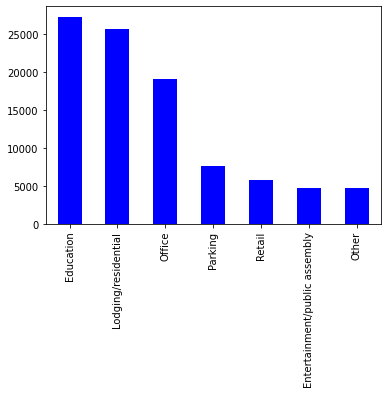

In [ ]:
array=train_df['primary_use'].value_counts()
print(type(array))
p = array.plot(kind='bar', color='b', alpha=1)

In [ ]:
fig = px.scatter(train_df, 
                 x='air_temperature', 
                 y='meter_reading', 
                 opacity=0.8, 
                 hover_data=['year_built'], 
                 title='Tempartue vs charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(train_df, 
                 x='Month', 
                 y='meter_reading', 
                 opacity=0.8, 
                 hover_data=['air_temperature'], 
                 title='Month vs charges')
fig.update_traces(marker_size=5)
fig.show()

#Cleaning the Data

In [ ]:
# get a list of the columns
col_list = list(train_df)
# use this handy way to swap the elements
col_list[1], col_list[11] = col_list[11], col_list[1]
# assign back, the order will now be swapped
col_list[11], col_list[14] = col_list[14], col_list[11]
train_df.columns = col_list


#Encoding categorical columns

In [ ]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'primary_use'.
train_df['primary_use']= label_encoder.fit_transform(train_df['primary_use'])
 
train_df['primary_use'].unique()


array([0, 1, 2, 3, 6, 5, 4])

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94905 entries, 84 to 698661
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   building_id         94905 non-null  int64  
 1   wind_speed          94905 non-null  float64
 2   primary_use         94905 non-null  int64  
 3   square_feet         94905 non-null  int64  
 4   year_built          94905 non-null  int64  
 5   air_temperature     94905 non-null  float64
 6   cloud_coverage      53659 non-null  float64
 7   dew_temperature     94905 non-null  float64
 8   precip_depth_1_hr   94905 non-null  float64
 9   sea_level_pressure  94905 non-null  float64
 10  wind_direction      94905 non-null  float64
 11  Month               94905 non-null  float64
 12  Dates               94905 non-null  object 
 13  Time                94905 non-null  object 
 14  meter_reading       94905 non-null  int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 11

#splitting into input and target columns

In [ ]:
input_cols = list(train_df.columns)[0:-3]
target_col = 'meter_reading'

In [ ]:
print(input_cols)


['building_id', 'wind_speed', 'primary_use', 'square_feet', 'year_built', 'air_temperature', 'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction', 'Month']


#Imputing the missing data 

In [ ]:
import math
cloud_mean=train_df['cloud_coverage'].mean()
train_df['cloud_coverage'].fillna(cloud_mean, inplace=True)


In [ ]:

train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 94905 entries, 84 to 698661
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   building_id         94905 non-null  int64  
 1   wind_speed          94905 non-null  float64
 2   primary_use         94905 non-null  int64  
 3   square_feet         94905 non-null  int64  
 4   year_built          94905 non-null  int64  
 5   air_temperature     94905 non-null  float64
 6   cloud_coverage      94905 non-null  float64
 7   dew_temperature     94905 non-null  float64
 8   precip_depth_1_hr   94905 non-null  float64
 9   sea_level_pressure  94905 non-null  float64
 10  wind_direction      94905 non-null  float64
 11  Month               94905 non-null  float64
 12  Dates               94905 non-null  object 
 13  Time                94905 non-null  object 
 14  meter_reading       94905 non-null  int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 11

#Scaling Data

In [ ]:
array = train_df.values
X = array[:,0:11]
Y = train_df['meter_reading'].values
t_size = 0.20
seed = 41
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
data_scaled


array([[-1.69672465, -0.60395648, -1.19352737, ..., -0.1841645 ,
         0.54680494, -0.73391925],
       [-1.35641364, -0.60395648, -0.64039961, ..., -0.1841645 ,
         0.54680494, -0.73391925],
       [-0.50563609, -0.60395648, -0.08727185, ..., -0.1841645 ,
         0.54680494, -0.73391925],
       ...,
       [ 0.54932807,  0.18360244, -0.08727185, ..., -0.10523686,
         0.76822366, -1.3245989 ],
       [ 0.92367019, -0.23350935, -0.08727185, ..., -0.10523686,
         0.76822366, -1.3245989 ],
       [ 1.16188791, -0.56800689,  0.46585591, ..., -0.10523686,
         0.76822366, -1.3245989 ]])

#Splitting data into training and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data_scaled, Y, test_size=t_size,
random_state=seed)

#calculating RMSE loss

In [ ]:
import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

#Applying different ML models

In [ ]:
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
model = LinearRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
predictions = np.round(predictions, 2)
print("RMSE loss:",rmse(Y_test, predictions))
print("Model accuracy:",model.score(X_test,Y_test))

RMSE loss: 2.960569356224961
Model accuracy: 0.27359015675434384


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
predictions
print(model.score(X_test,Y_test))

0.9863903000425536


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=2, random_state=42)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
predictions
print("RMSE loss:",rmse(Y_test, predictions))
print("Model accuracy:",model.score(X_test,Y_test))

RMSE loss: 1.6358011509860242
Model accuracy: 0.7782355863540584


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
model = MLPRegressor(random_state=42, max_iter=50)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
predictions
print("RMSE loss:",rmse(Y_test, predictions))
print("Model accuracy:",model.score(X_test,Y_test))

RMSE loss: 1.501061934278336
Model accuracy: 0.8132639959520171


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.



#Applying cross validation

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(model, X_train, Y_train, cv=folds)
scores   


array([0.28078478, 0.27238014, 0.26711532, 0.27415119, 0.26498681])